# Tabela Price

**Tabela Price** ou **sistema francês de amortização** é um método usado em amortização de empréstimos em que o valor das prestações (parcelas) é constante.

No sistema da tabela Price o combinado é que se deve pagar uma dívida $\$_0$ em $n$ prestação idênticas de valor $x$ com uma taxa de juros $R_{a}$ anual. O termo $1 + R_{a}$ é bastante frequente, por isso lançamos mão da váriavel auxiliar $Z_{a} = 1 + R_{a}$. Caso as prestações sejam pagas mensalmente, precisamos de $Z_{m}$, dado por $Z_{m} = Z_{a}^{\frac{1}{12}} = (1+R_{a})^{\frac{1}{12}}$.

Geralmente, o que se sabe é o valor que se quer financiar, $\$_0$; a quantidade $n$ de parcelas e a taxa de juros mensal, $R_m \rightarrow Z_m = 1 + R_m$. 

Com essas informações, podemos calcular as seguintes quantidades para cada parcela:

* Prestação:   $x = \frac{(Z_m - 1)Z_m^n}{Z_m^n-1}\$_0$


* Juros: $\$_{juros} = \frac{(Z_m-1)(Z_m^n-Z_m^{k-1})}{(Z_m^n-1)}\$_0$, juros pago na $k-ésima$ parcela


* Amortização: $\$_{amortização} = \frac{(Z_m-1)Z_m^{k-1}}{(Z_m^n-1)}\$_0$


* Dívida: $D_k = \frac{(Z_m^n-Z_m^k)}{(Z_m^n-1)}\$_0$

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt

pv = 500000       # Valor emprestado ou financiado
anos = 30         # Quantidade de anos
Ra = 0.10         # Taxa de juros a.a
Za = 1 + Ra       

n = 12*anos       # Quantidade de meses
Zm = Za**(1/12)    

## Calculando prestação, dívida, juros e amortização

In [2]:
# Array com a quantidade de parcelas
N = np.arange(n+1)

# Array com o valor das parcelas, que deve ser constante
x = ((Zm-1)*Zm**n/(Zm**n-1))*pv
X = np.zeros(n+1)
X = X + x
X[0] = 0

# Arrays com o valor da dívida, juros e amortização
divida = np.zeros(n+1)
juros = np.zeros(n+1)
amortizacao = np.zeros(n+1)
for i in range(n):
    k=i+1
    divida[k] = (Zm**n-Zm**k)/(Zm**n-1)*pv
    juros[k] = (Zm-1)*(Zm**n-Zm**(k-1))/(Zm**n-1)*pv
    amortizacao[k] = (Zm-1)*Zm**(k-1) / (Zm**n-1)*pv
divida[0] = pv

## Montando a tabela Price

In [3]:
# Tabela Price
price = pd.DataFrame()
price['Tempo'] = N
price['Prestação'] = X
price['Juros'] = juros
price['Amortização'] = amortizacao
price['Dívida'] = divida
price.head()

,Tempo,Prestação,Juros,Amortização,Dívida
0,0,0.00,0.00,0.00,500000.00
1,1,4229.45,3987.07,242.38,499757.62
2,2,4229.45,3985.14,244.32,499513.30
3,3,4229.45,3983.19,246.26,499267.03
4,4,4229.45,3981.23,248.23,499018.81


In [4]:
price.tail()

,Tempo,Prestação,Juros,Amortização,Dívida
356,356,4229.45,164.67,4064.78,16585.86
357,357,4229.45,132.26,4097.20,12488.66
358,358,4229.45,99.59,4129.87,8358.79
359,359,4229.45,66.65,4162.80,4195.99
360,360,4229.45,33.46,4195.99,0.00


## Evolução da dívida na tabela Price

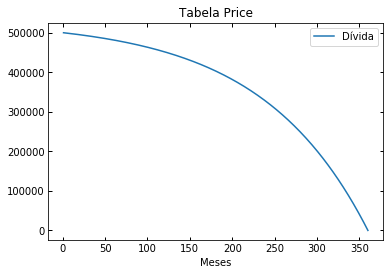

In [5]:
plt.title('Tabela Price')
plt.plot(price['Tempo'][1:], price['Dívida'][1:], label='Dívida')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

## Evolução da prestação, amortização e juros na tabela Price

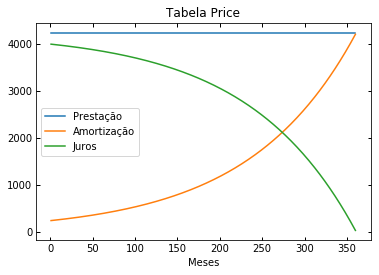

In [6]:
plt.title('Tabela Price')
plt.plot(price['Tempo'][1:], price['Prestação'][1:], label='Prestação')
plt.plot(price['Tempo'][1:], price['Amortização'][1:], label='Amortização')
plt.plot(price['Tempo'][1:], price['Juros'][1:], label='Juros')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

# Tabela SAC

Sistema de Amortização Constante (SAC) é um método usado em amortização de empréstimo em que, diferente do sistema Price, onde a prestação é constante, no SAC, como o próprio nome diz, a amortização da dívida é constante.

No SAC o valor da prestação varia, sendo maior no começo do período e tende ao valor da amortização à medida que o tempo passa.

* Dívida: $D_k = \frac{n-k}{n}\$_0$

* Amortização: $\$_{amortização} = \frac{\$_0}{n}$

* Juros: $\$_{juros} = (Z_m-1)D_{k-1} = (Z_m - 1)(n+1-k)\frac{\$_0}{n}$

* Prestação:   $x = [1+(Z_m-1)(n+1-k)]\frac{\$_0}{n}$

## Calculando prestação, dívida, juros e amortização

In [7]:
# Array com o valor das amortizações, que deve ser constante
amort = pv/n
amortizacao = np.zeros(n+1)
amortizacao = amortizacao + amort
amortizacao[0] = 0

# Arrays com o valor da dívida, juros e prestação
divida = np.zeros(n+1)
juros = np.zeros(n+1)
X = np.zeros(n+1)
for i in range(n):
    k=i+1
    divida[k] = pv*(n-k)/n
    juros[k] = (Zm-1)*(n+1-k)*pv/n
    X[k] = (1+(Zm-1)*(n+1-k))*pv/n
divida[0] = pv

## Montando a tabela SAC

In [8]:
# Tabela SAC
sac = pd.DataFrame()
sac['Tempo'] = N
sac['Prestação'] = X
sac['Juros'] = juros
sac['Amortização'] = amortizacao
sac['Dívida'] = divida
sac.head()

,Tempo,Prestação,Juros,Amortização,Dívida
0,0,0.00,0.00,0.00,500000.00
1,1,5375.96,3987.07,1388.89,498611.11
2,2,5364.88,3976.00,1388.89,497222.22
3,3,5353.81,3964.92,1388.89,495833.33
4,4,5342.73,3953.84,1388.89,494444.44


In [9]:
sac.tail()

,Tempo,Prestação,Juros,Amortização,Dívida
356,356,1444.26,55.38,1388.89,5555.56
357,357,1433.19,44.30,1388.89,4166.67
358,358,1422.11,33.23,1388.89,2777.78
359,359,1411.04,22.15,1388.89,1388.89
360,360,1399.96,11.08,1388.89,0.00


## Evolução da dívida na tabela SAC

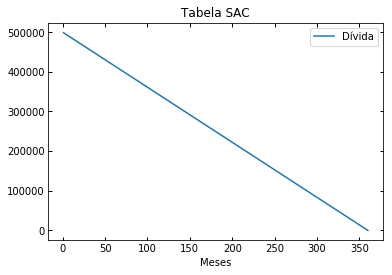

In [24]:
plt.title('Tabela SAC')
plt.plot(sac['Tempo'][1:], sac['Dívida'][1:], label='Dívida')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

## Evolução da prestação, amortização e juros na tabela SAC

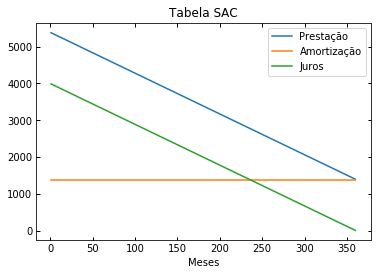

In [25]:
plt.title('Tabela SAC')
plt.plot(sac['Tempo'][1:], sac['Prestação'][1:], label='Prestação')
plt.plot(sac['Tempo'][1:], sac['Amortização'][1:], label='Amortização')
plt.plot(sac['Tempo'][1:], sac['Juros'][1:], label='Juros')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

# Comparando a evolução das dívidas nos sistemas Price e SAC

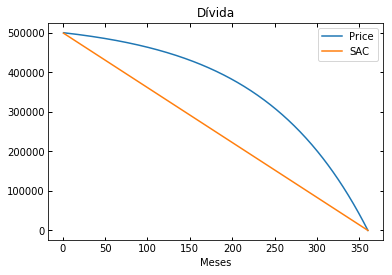

In [12]:
plt.title('Dívida')
plt.plot(price['Tempo'][1:], price['Dívida'][1:], label='Price')
plt.plot(sac['Tempo'][1:], sac['Dívida'][1:], label='SAC')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

Da figura acima pode ver que se demora mais a amortizar a dívida na tabela Price.

# Comparando a evolução das prestação nos sistemas Price e SAC

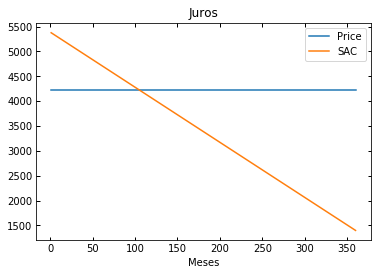

In [28]:
plt.title('Juros')
plt.plot(price['Tempo'][1:], price['Prestação'][1:], label='Price')
plt.plot(sac['Tempo'][1:], sac['Prestação'][1:], label='SAC')
plt.xlabel('Meses')
plt.tick_params(axis='both', direction='in', top='on', right='on', width=1)
plt.legend()
plt.show()

Da figura acima vemos que enquanto a prestação no sistema Price é constante, no sistema SAC ela decresce linearmente. No começo, em cerca de um terço do período total, a prestação na tabela SAC é maior que a da tabela Price. A partir desse momento, as relações se invertem e a prestação na tabela SAC fica menor que a da tabela Price.

# Total pago nos sistemas Price e SAC

In [13]:
print("Total pago na tabela SAC:   R$ %.0f" %(sum(sac['Prestação'])))
print("Total pago na tabela Price: R$ %.0f" %(sum(price['Prestação'])))

Total pago na tabela SAC:   R$ 1219666
Total pago na tabela Price: R$ 1522603


*Obs: No sistema SAC paga-se menos no total. Isso se deve ao princípio de que o dinheiro no presente vale mais que no futuro. No sistema SAC paga-se parcelas maiores no início do fluxo de pagamento, por isso, menos juros incidem sobre a dívida restante, o que acarreta em um valor total pago menor para o sistema SAC.*

# Valor Presente (Present Value)

Imagine que alguém nos faça a seguinte proposta: 

*"Me empresta R\$ 1000 hoje que eu te pago daqui a um ano com R\$ 1200"*

É um bom negócio? O que você acha?

Nesse caso, uma medida para uma boa tomada de decisão é calcular o **valor presente** dos R\$ 1200 que iremos receber daqui a um ano, ou seja, quanto valem hoje esses R\$ 1200. Geralmente se o $VP$ for menor que R\$ 1000, então o negóćio já é um mau negócio de cara. Caso $VP$ $>$ R\$ 1000, então precisamos analisar o quanto $VP$ é maior que R\$ 1000 para sabermos se o risco de emprestarmos dinheiro para essa pessoa está sendo bem pago com os juros cobrados.

Antes dos cálculos, devemos pensar mais um pouco e descobrir uma *taxa livre de risco*, presente em toda economia com forte base monetária. No nosso caso, o governo brasileiro oferece essa taxa sobe o nome de taxa SELIC, que corresponde ao pagamento de juros ao se comprar títulos do governo, especialmente se for o título atrelado à taxa SELIC. Para nós, o que interessa é que se uma pessoa deseja pedir dinheiro emprestado a você, ela deve pagar uma taxa de juros maior que a SELIC, porque você tem mais riscos emprestando dinheiro para a pessoa do que para o governo (você empresta dinheiro pro governo quando compra títulos públicos). 

Atualmente, o valor da taxa SELIC está em 6.5% ao ano. Usando essa taxa, podemos calcular o $VP$ dos R\$ 1200 que nosso amigo está oferecendo nos pagar caso emprestemos R\$ 1000 pra ele hoje:

$VP = \frac{R\$ 1200}{(1+0.065)} = R\$  1126.76$,

o valor de receber R\$ 1200 daqui a um ano está, de acordo com uma taxa livre de risco (SELIC), R\$ 1126.75. O seu amigo está te oferecendo o direito de receber R\$ 1200 daqui a um ano por R\$ 1000, o que parece ser um bom negócio. Se você aceitar fechar o negócio, então está aceitando que a diferença de R\$ 1126.75 - R\$ 1000 = R\$ 126.76 deve cobrir o risco de se emprestar para o seu amigo e não para o governo. Dizemos que R\$ 126.76 é o nosso prêmio pelo risco.

De quanto foi a taxa de juros do prêmio pelo risco?

$100 x \frac{R\$ 126.76}{R\$ 1000} = 12.76 \%$,

logo, o prêmio pelo risco de emprestarmos dinheiro para o nosso amigo em termo de taxa de juros é de 12.76%.

## Valor Presente de um fluxo de pagamentos constante

Esse é o caso de uma pessoa que, por exemplo, faz o compra um smartphone ou TV em 10x pelo sistema Price, onde o valor da prestação é constante. O que a loja deseja saber é quanto vale um fluxo de pagamentos constante, que deverá ser recebido em n períodos no futuro, hoje?

Se a pessoa está oferecendo pagar o valor $x$ a cada período, devemos então calcular o $VP$ descontando o valor do futuro pelo fator $\frac{1}{1+R}$ correspondente a cada período ($R$ é uma taxa considerada livre de risco,  não precisa necessariamente ser a taxa SELIC, nesse caso da loja). Assim o $VP$ é dado por:

$VP = \frac{x}{(1+R)} + \frac{x}{(1+R)^2} + ... + \frac{x}{(1+R)^n} = \frac{x}{Z} + \frac{x}{Z^2} + ... + \frac{x}{Z^n}$

$VP = \frac{x}{Z}\left[1 + \frac{1}{Z} + \frac{1}{Z^2} + ...
+ \frac{1}{Z^{n-1}}\right] = \frac{Z(Z^n-1)}{Z^n(Z-1)}x$

$VP = \frac{Z(Z^n-1)}{Z^n(Z-1)}x$.

## Valor Presente de um fluxo de pagamentos variável

Este é o caso de uma pessoa que, por exemplo, financia a compra de uma casa ou um carro pelo sistema SAC, em que as prestações variam de acordo com o período. Lembre-se: no SAC, como o próprio nome diz, o que é constante é a amortização.

Nesse caso, aproveitando as contas acima e sabendo agora que o fluxo de pagamento é variável, ou seja, para cada período t teremos um valor de parcela $x_t$, temos que o $VP$ pode ser facilmente calculado usando a seguinte fórmula:

$VP = \sum_t \frac{x_t}{Z^t}$


## Calculando os $VP$ para os fluxos de pagamentos Price e SAC

In [14]:
Ra = 0.065  # Valor da taxa Selic em 07/03/2018
Zm = (1+Ra)**(1/12)

vp_price = price['Prestação'][1]*(Zm**(n)-1)/(Zm**(n)*(Zm-1))

ZZ = [1/Zm**i for i in range(1,361)]
vp_sac = sum(sac['Prestação'][1:]*ZZ)

print('VP (Price): R$ %.0f\nVP (SAC):   R$ %.0f'%(vp_price, vp_sac))

VP (Price): R$ 682293
VP (SAC):   R$ 642252


O valor presente  para os dois fluxos de pagamento estão acima do que o banco está lhe oferecendo, que é R\$ 500000. Se o banco usasse a taxa SELIC para fazer negócio com você, você receberia, usando como exemplo o sistema SAC, R\$ 642252 ao invés de R$ 500000 pelo mesmo fluxo de pagamento.

Em outras palavras, se você pudesse ir no governo pedir financiamento para a sua casa pelo mesmo fluxo de pagamentos, você receberia R\$ 642252 ao invés de R\$ 500000, que é o que o banco está lhe oferecendo.